### House prices dataset

The aim of this project is to get a good prediction of the House prices with the help of regression models and using the dataset from Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# % pip install yfinance
# % pip install catboost
# % pip install lightgbm

### Exctracting data into Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
dfx = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (2).csv


In [ ]:
df = dfx.copy()
dfexp = df.copy()
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Transforming data:
1. Dropping data, which does not provide any useful signals
2. Changing certain data types into categoricals
3. Cutting Age and Fare data into bins
4. Getting Titles from the Name data
5. Dropping or imputing missing data

In [ ]:
df.index = df.Id

In [ ]:
df.isna().sum().nlargest(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
dtype: int64

In [ ]:
df.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [ ]:
a = (df.isna().sum().nlargest(14)).copy()
a

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [ ]:
for col in a.keys():
  # print((df[col].dtypes))
  if df[col].dtypes == 'float64':
    df[col].fillna(df[col].mean(), inplace= True)
  if df[col].dtypes == 'object':
    df[col].fillna(df[col].mode()[0], inplace= True)

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


In [ ]:
df.dtypes.head(50)

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF        

In [ ]:
enco = OrdinalEncoder()
encs = StandardScaler()

In [ ]:
for col in df.columns[:-1]:
  # print((df[col].dtypes))
  if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
    df[col] = encs.fit_transform(np.array(df[col]).reshape(-1,1))
  if df[col].dtypes == 'object':
    df[col] = enco.fit_transform(np.array(df[col]).reshape(-1,1))

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.073375,3.0,-0.229372,-0.207142,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,0.651479,-0.517200,1.050994,0.878668,1.0,1.0,12.0,13.0,1.0,0.511418,2.0,4.0,2.0,2.0,3.0,3.0,2.0,0.575425,5.0,-0.288653,-0.944591,-0.459303,1.0,0.0,1.0,4.0,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,2.0,0.912210,6.0,-0.951226,1.0,1.021157,1.0,0.311725,0.351000,4.0,4.0,2.0,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8.0,4.0,208500
2,-0.872563,3.0,0.451936,-0.091886,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,-0.071836,2.179628,0.156734,-0.429577,1.0,1.0,8.0,8.0,2.0,-0.574410,3.0,4.0,1.0,2.0,3.0,1.0,0.0,1.171992,5.0,-0.288653,-0.641228,0.466465,1.0,0.0,1.0,4.0,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,3.0,-0.318683,6.0,0.600495,1.0,-0.104483,1.0,0.311725,-0.060731,4.0,4.0,2.0,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8.0,4.0,181500
3,0.073375,3.0,-0.093110,0.073480,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,0.651479,-0.517200,0.984752,0.830215,1.0,1.0,12.0,13.0,1.0,0.323060,2.0,4.0,2.0,2.0,3.0,2.0,2.0,0.092907,5.0,-0.288653,-0.301643,-0.313369,1.0,0.0,1.0,4.0,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,2.0,-0.318683,6.0,0.600495,1.0,0.937776,1.0,0.311725,0.631726,4.0,4.0,2.0,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8.0,4.0,223500
4,0.309859,3.0,-0.456474,-0.096897,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,0.651479,-0.517200,-1.863632,-0.720298,1.0,1.0,13.0,15.0,2.0,-0.574410,3.0,4.0,0.0,3.0,1.0,3.0,0.0,-0.499274,5.0,-0.288653,-0.061670,-0.687324,1.0,2.0,1.0,4.0,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,2.0,0.296763,6.0,0.600495,5.0,0.812705,2.0,1.650307,0.790804,4.0,4.0,2.0,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8.0,0.0,140000
5,0.073375,3.0,0.633618,0.375148,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.374795,-0.517200,0.951632,0.733308,1.0,1.0,12.0,13.0,1.0,1.364570,2.0,4.0,2.0,2.0,3.0,0.0,2.0,0.463568,5.0,-0.288653,-0.174865,0.199680,1.0,0.0,1.0,4.0,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,2.0,1.527656,6.0,0.600495,1.0,0.896086,1.0,1.650307,1.698485,4.0,4.0,2.0,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,3.0,-0.365633,-0.260560,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,-0.071836,-0.517200,0.918511,0.733308,1.0,1.0,12.0,13.0,2.0,-0.574410,3.0,4.0,2.0,2.0,3.0,3.0,5.0,-0.973018,5.0,-0.288653,0.873321,-0.238122,1.0,0.0,1.0,4.0,-0.542435,0.795198,-0.120242,0.250402,-

### Exploratory data analysis

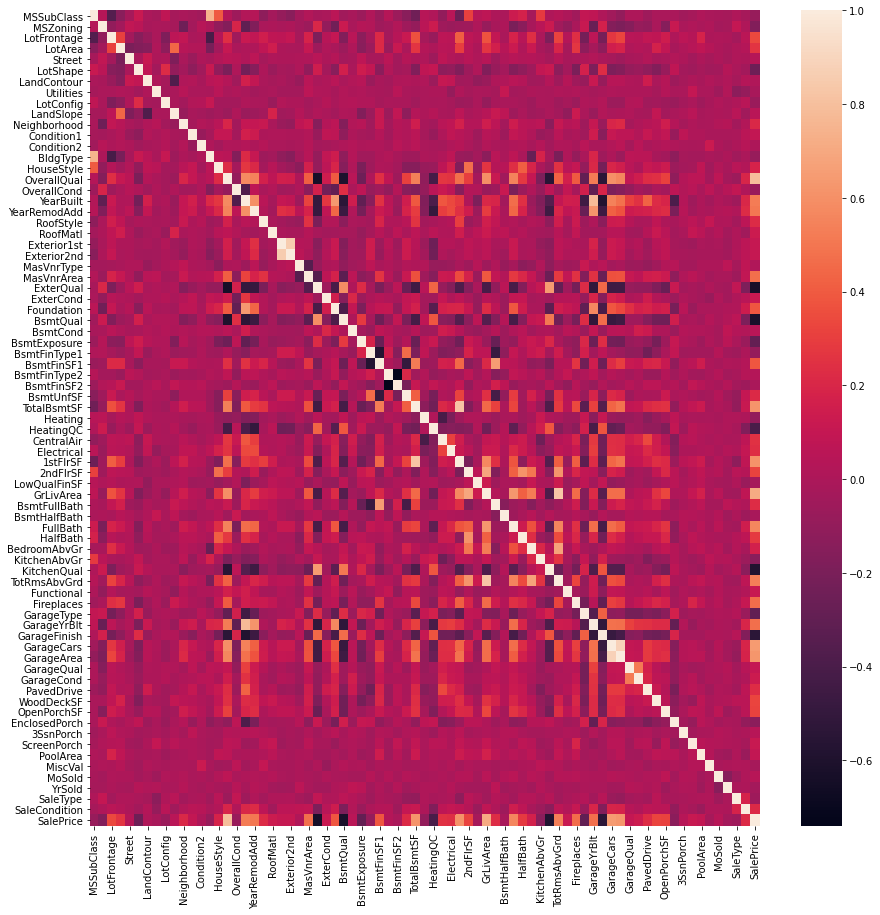

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr)

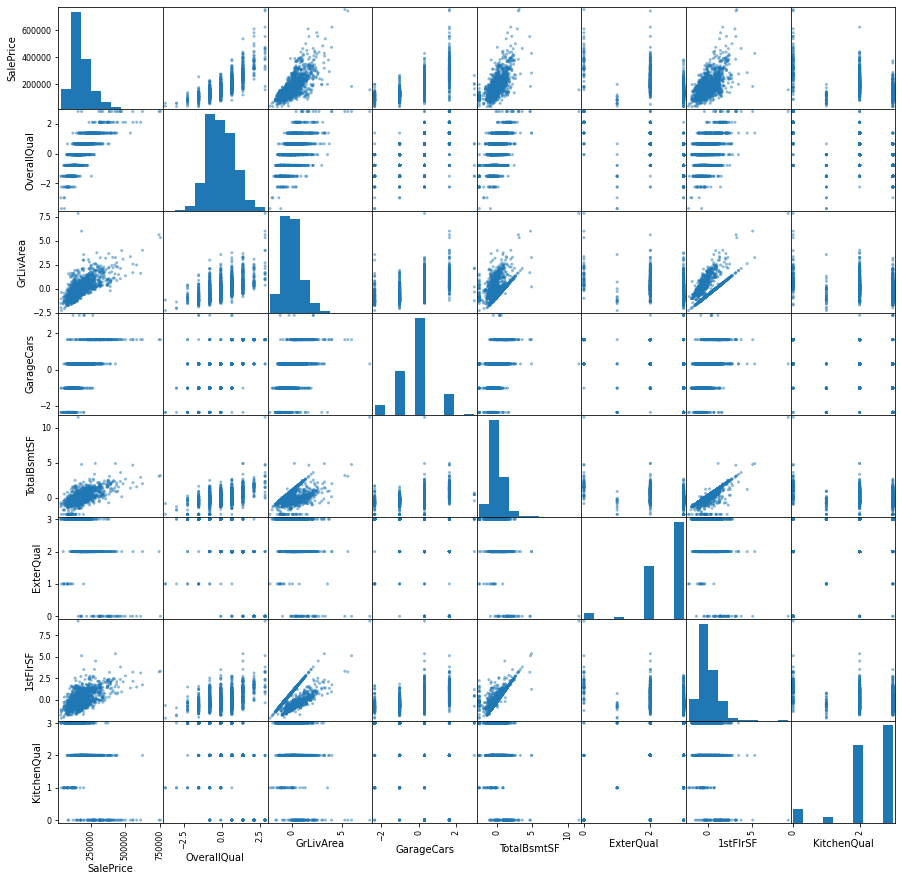

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'KitchenQual']], figsize=(15, 15))
plt.show()

In [ ]:
Y = df.iloc[:, -1]
X = df.iloc[:, :-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

### Data Modeling

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
 
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
OverallQual,2070.956633
GrLivArea,1477.327231
TotalBsmtSF,943.370463
ExterQual,874.882353
1stFlrSF,869.292970
GarageCars,812.543014
BsmtQual,796.395677
GarageArea,759.197287
KitchenQual,708.105503


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from sklearn.neural_network import MLPRegressor
 
from sklearn.metrics import mean_squared_error

In [ ]:
models = []
# models.append(('LR',LinearRegression()))
models.append(('RG',Ridge()))
models.append(('LS', Lasso()))
models.append(('LN', ElasticNet()))
models.append(('SVR',SVR()))
# models.append(('SGD',SGDRegressor()))
models.append(('TREE',DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETRR', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('GDTR', GradientBoostingRegressor()))
models.append(('CAT', CatBoostRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('XGB', XGBRFRegressor()))
# models.append(('MLP', MLPRegressor()))

In [ ]:
from sklearn.model_selection import cross_val_score
 
scoringx = []
trainscore = []
testscore = []
names = []
for name, model in models:
  names.append(name)
  score = -1*cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
  scoringx.append(score)
  res = model.fit(X_train, y_train)
  trainresult = mean_squared_error(res.predict(X_train), y_train)
  trainscore.append(trainresult)
  testresult = mean_squared_error(res.predict(X_test), y_test)
  testscore.append(testresult)
  print("%s: %f (%f) %f %f" % (name, score.mean(), score.std(), trainresult, testresult))
  # print(f'{name}: {score.mean()}, {score.std()}')

Streaming output truncated to the last 5000 lines.
18:	learn: 53725.4379338	total: 118ms	remaining: 6.08s
19:	learn: 52741.0828830	total: 123ms	remaining: 6.02s
20:	learn: 51723.1296404	total: 128ms	remaining: 5.96s
21:	learn: 50706.6267403	total: 133ms	remaining: 5.91s
22:	learn: 49744.0260119	total: 138ms	remaining: 5.86s
23:	learn: 48827.9501600	total: 143ms	remaining: 5.83s
24:	learn: 47995.9129995	total: 149ms	remaining: 5.79s
25:	learn: 47086.3713872	total: 154ms	remaining: 5.76s
26:	learn: 46237.1126668	total: 159ms	remaining: 5.72s
27:	learn: 45332.7995230	total: 164ms	remaining: 5.7s
28:	learn: 44520.9941626	total: 170ms	remaining: 5.68s
29:	learn: 43668.9157742	total: 175ms	remaining: 5.65s
30:	learn: 42873.1908381	total: 180ms	remaining: 5.62s
31:	learn: 42142.1966345	total: 185ms	remaining: 5.6s
32:	learn: 41431.8399988	total: 190ms	remaining: 5.58s
33:	learn: 40760.5933667	total: 195ms	remaining: 5.55s
34:	learn: 40100.2409984	total: 200ms	remaining: 5.52s
35:	learn: 39444

### Model Tuning and Evaluation



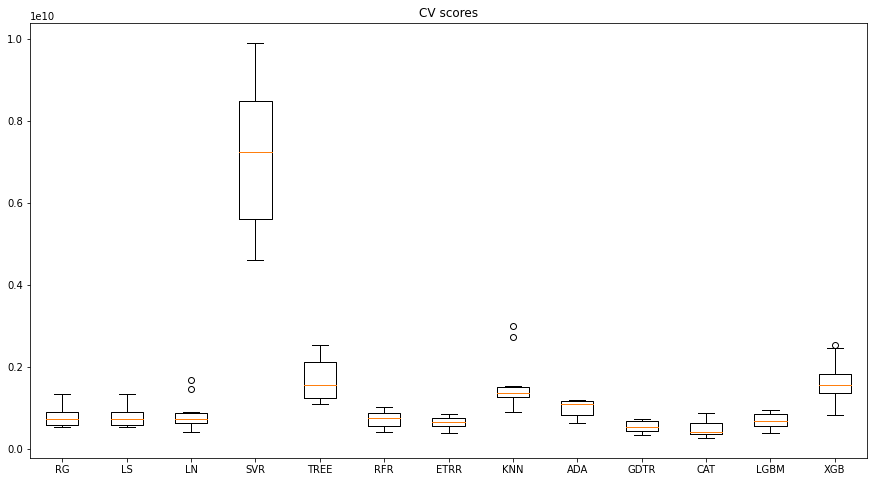

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(scoringx)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
ax.set_title('CV scores')
plt.show()

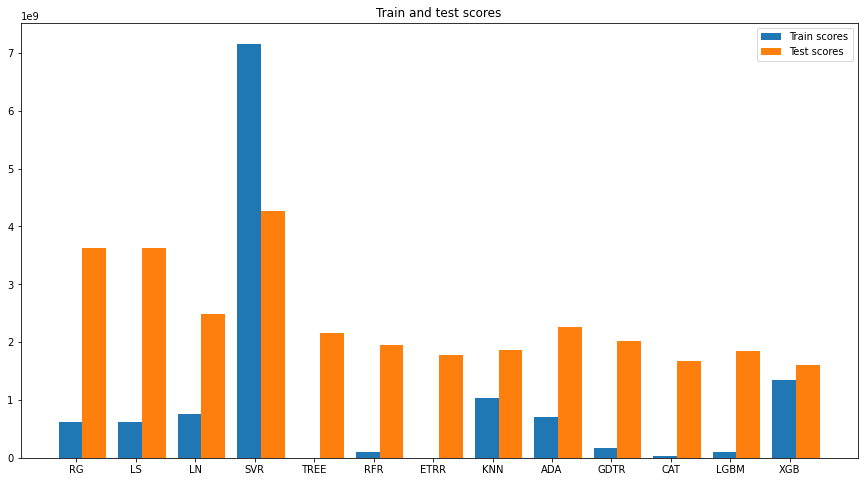

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(np.arange(len(trainscore)) - 0.1 , np.array(trainscore), width=0.4, label = 'Train scores')
plt.bar(np.arange(len(testscore)) + 0.3 , np.array(testscore), width=0.4, label = 'Test scores')

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
ax.set_title('Train and test scores')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate':[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10]}
mod = GradientBoostingRegressor()
clf = GridSearchCV(mod, parameters)
mod2 =clf.fit(X_train, y_train)
pred = pd.Series(mod2.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


In [ ]:
clf.best_params_

{'learning_rate': 0.1}

In [ ]:
### Prediction results

In [ ]:
pred.name = 'SalePricePredicted'
y_test.name = 'SalePriceTrue'
pred.index = X_test.index

In [ ]:
test = pd.concat([X_test, round(pred, 0), y_test], axis=1)

In [ ]:
test.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePredicted,SalePriceTrue
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536,3.147673,3.0,-2.269135e-03,-0.352464,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,1.0,5.0,-0.795151,1.280685,-2.029235,0.297226,1.0,1.0,8.0,8.0,2.0,-0.574410,3.0,4.0,1.0,2.0,3.0,1.0,2.0,1.152253,5.0,-0.288653,-0.949118,0.135834,1.0,4.0,1.0,4.0,-0.886588,0.412503,-0.120242,-0.320700,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,3.0,-0.934130,6.0,-0.951226,1.0,0.000000,2.0,-2.365440,-2.212963,4.0,4.0,0.0,-0.073782,-0.704483,2.063005,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,0.138777,8.0,4.0,132209.0,107500
778,-0.872563,3.0,1.360347e+00,0.283946,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,-0.795151,-0.517200,0.090492,-0.526484,3.0,1.0,6.0,10.0,2.0,-0.574410,3.0,4.0,1.0,3.0,3.0,3.0,0.0,0.698248,5.0,-0.288653,-1.053258,-0.441061,1.0,4.0,1.0,4.0,-0.695104,-0.795163,-0.120242,-1.183063,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,3.0,-0.934130,6.0,0.600495,1.0,-0.187864,2.0,0.311725,-0.154306,4.0,4.0,2.0,1.171272,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,-1.367655,8.0,4.0,143549.0,142500
204,1.492282,4.0,6.454645e-16,-0.609232,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,4.0,2.0,-0.071836,-0.517200,1.084115,0.927122,1.0,1.0,12.0,13.0,1.0,0.561278,2.0,4.0,2.0,2.0,3.0,0.0,2.0,0.478921,5.0,-0.288653,-0.863090,-0.477544,1.0,0.0,1.0,4.0,-0.814135,-0.795163,-0.120242,-1.270632,1.107810,-0.241061,-1.026041,-0.761621,-2.288708,-0.211454,2.0,-2.165023,6.0,0.600495,1.0,1.062847,1.0,0.311725,-0.247882,4.0,4.0,2.0,0.437009,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,0.138777,8.0,4.0,142851.0,149000
481,-0.872563,3.0,1.269506e+00,0.552842,1.0,0.0,3.0,0.0,2.0,0.0,16.0,2.0,2.0,0.0,2.0,2.098110,-0.517200,1.084115,0.975575,3.0,1.0,12.0,13.0,1.0,1.519688,2.0,4.0,2.0,0.0,3.0,1.0,2.0,1.792685,5.0,-0.288653,0.010775,1.768468,1.0,0.0,1.0,4.0,1.778662,-0.795163,-0.120242,0.636848,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,2.0,0.912210,6.0,0.600495,1.0,1.062847,0.0,1.650307,1.399044,4.0,4.0,2.0,3.390020,0.986508,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,-1.367655,8.0,4.0,339430.0,326000
1111,0.073375,3.0,6.454645e-16,-0.252242,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,-0.071836,-0.517200,0.786028,0.539493,1.0,1.0,6.0,6.0,2.0,-0.574410,3.0,4.0,2.0,2.0,3.0,3.0,2.0,-0.492694,5.0,-0.288653,-0.029975,-0.648560,1.0,2.0,1.0,4.0,-1.008206,1.232891,-0.120242,0.271342,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,3.0,0.912210,6.0,0.600495,1.0,0.687634,0.0,0.311725,-0.196415,4.0,4.0,2.0,1.035593,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.138777,8.0,4.0,187913.0,188000
1312,-0.872563,3.0,-9.311018e-02,-0.170661,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,0.651479,-0.517200,1.117235,1.072482,1.0,1.0,12.0,13.0,1.0,-0.131215,2.0,4.0,2.0,2.0,3.0,3.0,2.0,1.055749,5.0,-0.288653,-0.494074,0.493828,1.0,0.0,1.0,4.0,0.288192,-0.795163,-0.120242,-0.459668,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,2.0,-0.318683,6.0,-0.951226,1.0,1.104537,1.0,0.311725,0.163850,4.0,4.0,2.0,1.354837,0.775134,-0.359325,-0.116339,-0.270208,-0.068692